In [12]:
import numpy as np

import HepRead
import HepTools

import os
import matplotlib.pyplot as plt
import pandas as pd
import mplcyberpunk

In [45]:
model = 'BLSSM'
work_dir = '/scratch/mjad1g20/HEP/WorkArea/BLSSM_Work'
spheno_dir = '/scratch/mjad1g20/HEP/SPHENO/SPheno-3.3.8'
reference_lhs = '/scratch/mjad1g20/HEP/SPHENO/SPheno-3.3.8/BLSSM/Input_Files/LesHouches.in.BLSSM'
madgraph_dir = '/scratch/mjad1g20/HEP/MG5_aMC_v3_1_1'

In [2]:
param_cards_dir = '/Users/madiaz/WorkArea/BLSSM_model_files/BLSSM_work/HEscan_2/SPhenoBLSSM_output'

In [ ]:
h1 = np.array([])
h2 = np.array([])
cards = np.array([])
for card in os.listdir(param_cards_dir):
    path = os.path.join(param_cards_dir,card)
    try:
        slha = HepRead.Slha(path)
        h1 = np.append(h1,slha.particle(25).mass)
        h2 = np.append(h2,slha.particle(35).mass)
        cards = np.append(cards,card)
    except:
        pass
    
    


In [15]:
df = pd.DataFrame(dict(mh1 = h1, mh2 = h2, card_number=cards))
df.head()

,mh1,mh2,card_number
0,46.187985,119.054254,SPheno.spc.BLSSM_HEscan_319
1,98.988446,126.234874,SPheno.spc.BLSSM_HEscan_789
2,120.384639,205.172272,SPheno.spc.BLSSM_HEscan_22
3,121.129265,198.130132,SPheno.spc.BLSSM_HEscan_570
4,117.960378,149.256732,SPheno.spc.BLSSM_HEscan_114


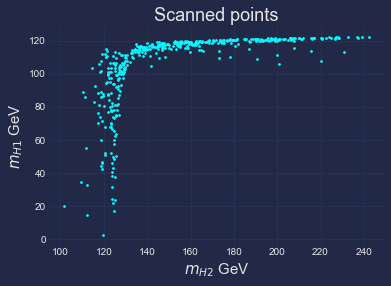

In [11]:
plt.style.use("cyberpunk")

plt.scatter(df.mh2, df.mh1,s=3)
plt.ylabel(r'$m_{H1}$ GeV',fontsize=15)
plt.xlabel(r'$m_{H2}$ GeV',fontsize=15)
plt.title('Scanned points',fontsize=18)
plt.show()

In [27]:
df_select = df[(df.mh2 > 125.) & (df.mh2 < 127)]
df_select.head()

,mh1,mh2,card_number
1,98.988446,126.234874,SPheno.spc.BLSSM_HEscan_789
14,101.095415,126.823011,SPheno.spc.BLSSM_HEscan_343
25,103.373610,125.021553,SPheno.spc.BLSSM_HEscan_381
33,85.595416,126.644244,SPheno.spc.BLSSM_HEscan_547
39,77.904835,126.147618,SPheno.spc.BLSSM_HEscan_327


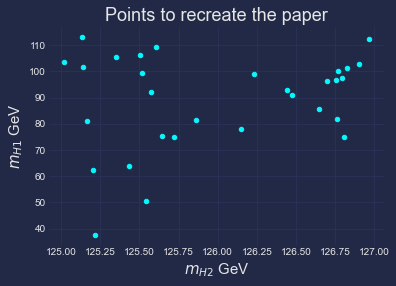

In [28]:
plt.style.use("cyberpunk")

plt.scatter(df_select.mh2, df_select.mh1,s=20)
plt.ylabel(r'$m_{H1}$ GeV',fontsize=15)
plt.xlabel(r'$m_{H2}$ GeV',fontsize=15)
plt.title('Points to recreate the paper',fontsize=18)
plt.show()

In [31]:
df_select[(df_select.mh1 < 93) & (df_select.mh1 > 87)]

,mh1,mh2,card_number
82,91.007744,126.471852,SPheno.spc.BLSSM_HEscan_855
193,92.837219,126.440641,SPheno.spc.BLSSM_HEscan_506
239,92.068742,125.572154,SPheno.spc.BLSSM_HEscan_770


In [47]:
selected_param_card = df.iloc[239].card_number
print('Param card : {}'.format(selected_param_card))
os.path.join(param_cards_dir,selected_param_card)

Param card : SPheno.spc.BLSSM_HEscan_770


'/Users/madiaz/WorkArea/BLSSM_model_files/BLSSM_work/HEscan_2/SPhenoBLSSM_output/SPheno.spc.BLSSM_HEscan_770'

In [21]:
from pathlib import Path
import uproot
import awkward as ak
plt.style.use("cyberpunk")

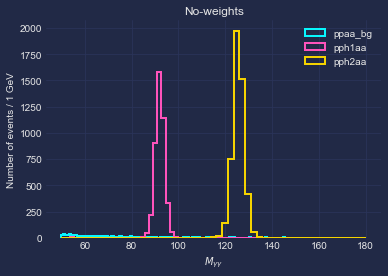

In [24]:
root_files_dir = '/Users/madiaz/WorkArea/BLSSM_model_files/BLSSM_work/HEscan_2'
processes = ['ppaa_bg', 'pph1aa', 'pph2aa']

for p in processes:
    root_file = Path(root_files_dir).joinpath(p).joinpath('tag_1_delphes_events.root')


    file = uproot.open(root_file)
    photons = file['Delphes']['Photon']

    select=ak.num(photons['Photon.PT'].array())==2

    a_PT = photons['Photon.PT'].array()[select]
    a_Phi = photons['Photon.Phi'].array()[select]
    a_Eta = photons['Photon.Eta'].array()[select]
    a_E = photons['Photon.E'].array()[select]

    a_px = a_PT*np.cos(a_Phi)
    a_py = a_PT*np.sin(a_Phi)
    a_pz = a_PT*np.sinh(a_Eta)

    imass_diph = np.sqrt(ak.sum(a_E,axis=1)**2-ak.sum(a_px,axis=1)**2-ak.sum(a_py,axis=1)**2-ak.sum(a_pz,axis=1)**2).to_numpy()

    w1 = 3
    n1 = int((imass_diph.max() - imass_diph.min())/w1)


    plt.hist(   imass_diph,bins=n1, range=(50, 180), density=False,
                linewidth=2, histtype='step', label=p)

    plt.legend()

plt.xlabel(r'$M_{\gamma\gamma}$')
plt.ylabel('Number of events / 1 GeV')
plt.title('No-weights')
#plt.title('Weights from Events in root file')
plt.show()
